# 1- Linear Regression
There are two methods for training a linear regression classifier that we will tackle, The normal equation and gradient descent . the normal equation gives a closed format solution for the 
$$
\{\theta}
$$

## 1.1 The normal equation


The mathematical formulation of the normal equation is as follows $$\hat{\theta} = (X^T X)^{-1} X^T y$$

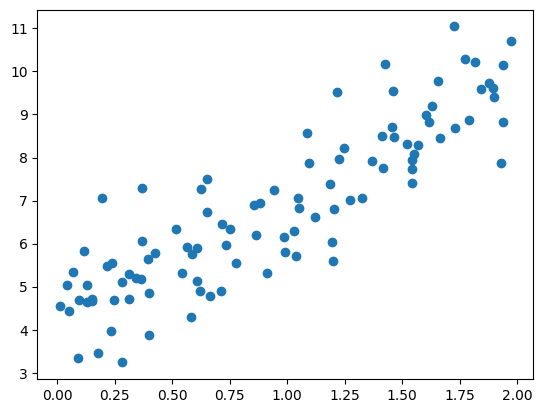

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) # to make this code example reproducible
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

plt.scatter(X,y)
plt.show()

Now let’s compute $\hat{\theta}$ using the Normal equation. We will use the inv() function
from NumPy’s linear algebra module (np.linalg) to compute the inverse of a
matrix, and the dot() method for matrix multiplication:

In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance

First we need to add the dummy feature since it is not added by default in Scikit-Learn. This is done using the add_dummy_feature function, because for theta 0 we have x0 = 1.

In [5]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In many libraries , @ operator performs matrix multiplication. in this case it is equivalent to np.matmul method .Many other libraries, like TensorFlow, PyTorch, and JAX,support the @ operator as well. However, you cannot use @ on pure Python arrays (i.e., lists of
lists)

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for $${\theta} = 4 $$ and θ1 = 3 instead of θ = 4.215 and θ1 = 2.770.
Close enough, but the noise made it impossible to recover the exact parameters of
the original function. The smaller and noisier the dataset, the harder it gets.


In [7]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict


array([[4.21509616],
       [9.75532293]])

let's plot it now

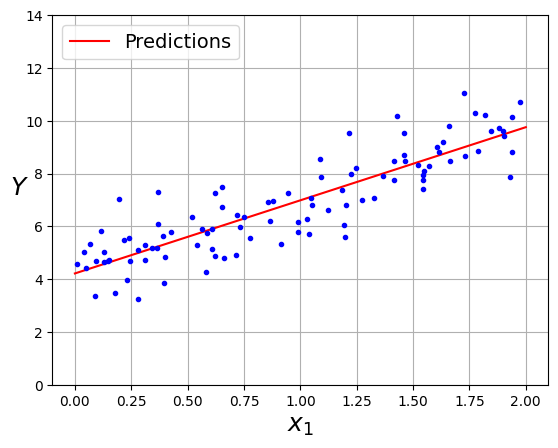

<Figure size 640x480 with 0 Axes>

In [22]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)

plt.grid(True)
plt.legend(loc="upper left", fontsize=14)

plt.ylim((0,14))

plt.figure()
plt.show()


Performing linear regression using Scikit-Learn is relatively straightforward:



In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)


array([[4.21509616],
       [9.75532293]])

Notice that Scikit-Learn separates the bias term (intercept_) from the feature
weights (coef_). The LinearRegression class is based on the
scipy.linalg.lstsq() function (the name stands for “least squares”), which
you could call directly:

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd


array([[4.21509616],
       [2.77011339]])

This function computes ˆ𝛉 = X+y, where X+ is the pseudoinverse of X
(specifically, the Moore–Penrose inverse). You can use np.linalg.pinv() to
compute the pseudoinverse directly:

In [23]:
np.linalg.pinv(X_b) @ y


array([[4.21509616],
       [2.77011339]])

While the pseudo inverse itself is computed using a mathematecal factorization called the SVD ( singular value decomposition )that can decompose the training set matrix X into the matrix multiplication of three matrices U Σ V (see
numpy.linalg.svd()). The pseudoinverse is computed as X+ = VΣ+U⊺
. 

## Computational Complexity


While the normal equation gives a direct way to calculate the weights vector theta. it comes with great price , computational complexity !! it may seem that it does a great job in datasets where there is small number of features , but as gets greater , the complexity of calculation the normal equation formula becomes more and more complex since it contains the matrix inverse operation ( which is a very )

Here come The Gradient Descent To Shine 

## Gradient Descent 


Gradient descent is a generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of gradient descent is to
tweak parameters iteratively in order to minimize a cost function.

### Types of Gradient Descent
#### Batch Gradient Descent
here is the cost function of gradient descent
$$
\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)}) x_j^{(i)}
$$



After having the gradient vector we can calculate the parameters of next step :

$$
\theta_{\text{{next step}}} = \theta - \eta \nabla_\theta MSE(\theta)
$$
